In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [90]:
#[].to_csv()
#_변수이름 = pd.read_csv("__경로_파일명",___
#train : 학습 용도, test: 실제 (답이 없는) 문제, sub: OMR 답안지
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [124]:
*train.head() 데이터를 확인
*데이터 개수 확인: tr 891개, test418개

SyntaxError: invalid syntax (1061806298.py, line 1)

In [92]:
print(train,columns)
print(test,columns)
print(sub,columns)

NameError: name 'columns' is not defined

In [93]:
train에는 survived가 있고, test에는 없다

SyntaxError: invalid syntax (56513219.py, line 1)

In [94]:
# train.describe() => 수치형 값: 요약값 보여줌
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [97]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [98]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [99]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [100]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

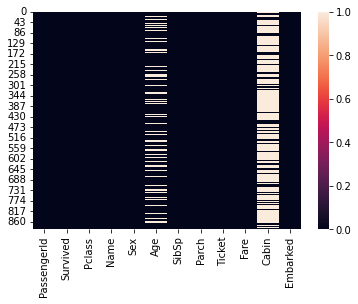

In [102]:
sns.heatmap(train.isnull())

In [103]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [104]:
## survived
## 01 p class별 생존자
## 02 생존자 성별

<AxesSubplot:xlabel='Survived', ylabel='count'>

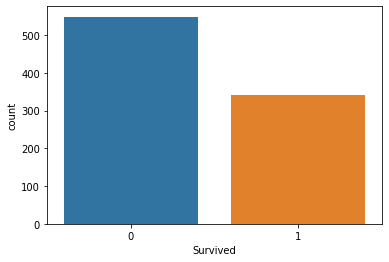

In [105]:
sns.countplot(x='Survived', data=train)

In [106]:
#생존자가 적다
#사망자가 500명 이상이다
#생존자가 330-350명 사이이다

In [107]:
## 01 pclass별 생존자

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

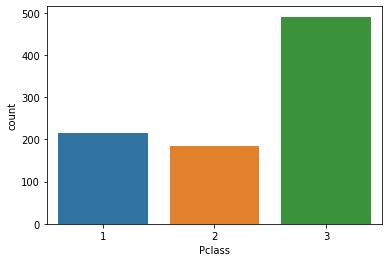

In [108]:
sns.countplot(x='Pclass', data=train)  #countplot, barplot

<AxesSubplot:xlabel='Pclass', ylabel='count'>

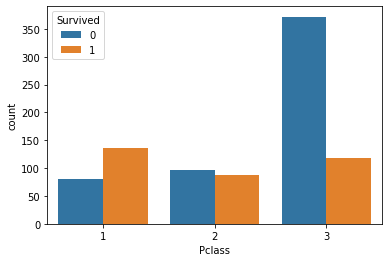

In [109]:
sns.countplot(x='Pclass', hue='Survived', data=train)

In [110]:
# 3등급의 승객은 많은 사람이 사망했다. 생존자에 비해 3배 이상
# 왜 사망했을까?
#왜 3등급은 많은 사람이 사망했을까?
#왜 1등급의 생존자보다 사망자가 많을까?

In [111]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [112]:
## 02 생존자 성별
*데이터 선확인, 시각화 유형 후선정
sns.countplot(x='Sex', hue='Survived', data=train)

SyntaxError: invalid syntax (934014165.py, line 2)

In [113]:
# 남성의 사망률이 더 높다 (아이, 노약자, 여자를 먼저 살리자고 영화에서 말했었음)
# 여성 생존률이 여성 사망률의 3배 가량이다
# 남성 탑승률 > 여성 탑승률

In [114]:
# boxplot, countplot, barplot, lmplot, 
# [가설1] 1등급은 여성이 많아서 그런 것이 아닐까?

### 1등급은 여성이 많기 때문에 생존자가 많은 것은 아니다

<AxesSubplot:xlabel='Age', ylabel='Count'>

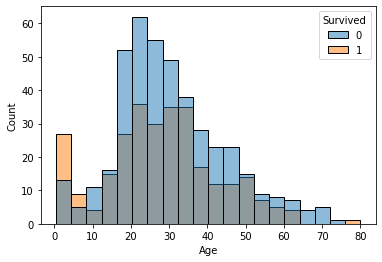

In [115]:
### [가설2] 나이가 영향을 미치지 않았을까?

#전체적인 histogram
sns.histplot(x='Age', hue='Survived', data=train)

In [116]:
## 1등급의 사람들을 뽑고, 1등급의 데이터를 가지고 histogram 그려보기

<AxesSubplot:xlabel='Pclass', ylabel='count'>

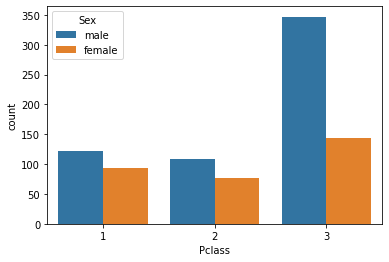

In [117]:
# [가설3] 3등급의 사망자가 많은 이유는 남성이 3등급이 많아서 그런 것이 아닐까?

sns.countplot(x='Pclass', hue='Sex', data=train)

In [118]:
train_p1 = train[train['Pclass']==1]   # 데이터에서 Pclass:1만 가져오기
train_p2 = train[train['Pclass']==2]   # 데이터에서 Pclass:2만 가져오기
train_p3 = train[train['Pclass']==3]   # 데이터에서 Pclass:3만 가져오기

<AxesSubplot:xlabel='Age', ylabel='Count'>

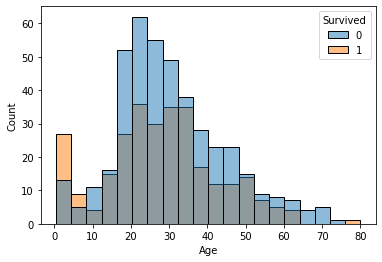

In [119]:
# sns.countplot(x='Pclass', hue='Survived', data=train)
sns.histplot(x='Age', hue='Survived', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

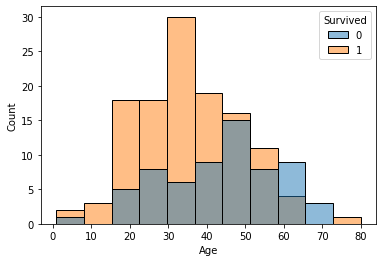

In [120]:
# sns.countplot(x='Pclass', hue='Survived', data=train_p1)
sns.histplot(x='Age', hue='Survived', data=train_p1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

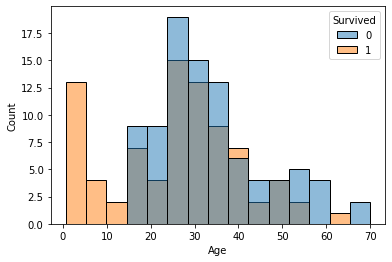

In [123]:
sns.histplot(x='Age', hue='Survived', data=train_p2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

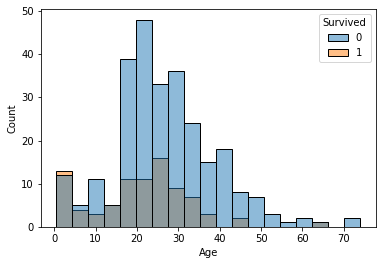

In [122]:
sns.histplot(x='Age', hue='Survived', data=train_p3)

In [ ]:
##01 Embarked(승선항)의 영향
## sns.countplot : x축 존재, y(데이터 개수) - 막대 그래프
## sns.boxplot: 박스 플롯, 최댓값, 최솟값, 이상치, 중앙값, 25%, 75%
## sns.lmplot(x='', y='', data=__)
## sns.lmplot(x='', y='', hue='', data=__) => hue에 수치형 column은 피해야 함 !!
## sns.pairplot(): 그래프 여러 개(하나의 변수와 다른 변수의 상관관계 보기)
## sns.heatmap()
## sns.histplot() : 히스토그램(수치형 컬럼에 대한 분포 등을 확인)
## sns.barplot() :  막대그래프 - x는 범주형, y는 그 값의 평균


##02 Fare의 요금 영향

In [125]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

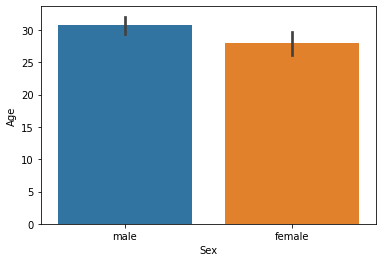

In [126]:
sns.barplot(x='Sex', y ='Age', data=train)

In [132]:
sns.countplot(x='Sex', y='Age', data=train)

ValueError: Cannot pass values for both `x` and `y`

<AxesSubplot:xlabel='Embarked', ylabel='count'>

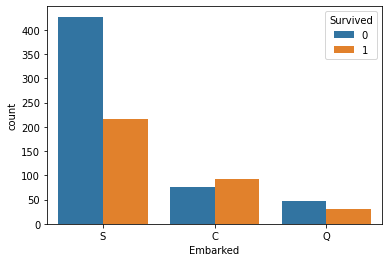

In [128]:
sns.countplot(x='Embarked', hue ='Survived', data=train)

In [ ]:
#분석1 S 항구 탑승자 多. 사망자 비율이 높음

#분석2 S 항구 생존자, 사망자 多

#분석3 C 항구 생존자>사망자 => WHY?

#분석4 Q 항구 승선 인원 少
    *하선하는 사람도 있겠다
    *항구 규모 차이의 가능성

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_C = train[train['Embarked']=='C']   # 데이터에서 Embarked:C만 가져오기
train_Q = train[train['Embarked']=='Q']   # 데이터에서 Embarked:Q만 가져오기
train_S = train[train['Embarked']=='S']   # 데이터에서 Embarked:S만 가져오기

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', hue='Survived', data=train_C)

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train_Q)

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=train_S)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

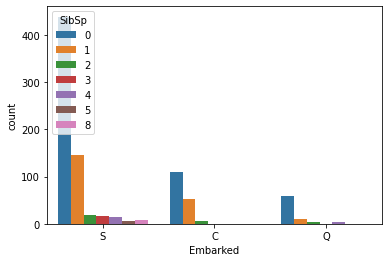

In [141]:
##분석3 C 항구의 생존자가 많은 이유
# :챙겨야 하는 가족이 최대 2인이다.
sns.countplot(x='Embarked', hue ='SibSp', data=train)

In [ ]:
sns.countplot(x='Embarked', hue ='SibSp', data=train)